# Pymaceuticals Inc.
---

### Analysis

When analyzing the data collected from the 249 mice in the drug trial, we identified a case of data duplication. To ensure the integrity of our analysis, we removed the duplicated entry, reducing the sample size. The gender distribution of the mice was nearly even, with 50.4% male and 49.6% female.

Among the drugs tested, Ramican exhibited a similar profile to the drug of interest. Statistical analysis revealed that Ramican had a smaller mean and median tumor volume compared to Capomulin. However, the variability in tumor size among individual mice was more pronounced with Ramican than with Capomulin.

We focused our analysis on four drugs: Capomulin, Ramican, Infubinol, and Ceftamins. Notably, the data showed that one mouse in the Infubinol group fell outside the expected range, indicating an outlier.
 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame by using pd.merge

study_data_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID")

# Display the data table for preview
study_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [23]:
# Checking the number of mice.
mice_count = study_data_df["Mouse ID"].nunique()
sex_count = study_data_df.groupby("Sex")["Mouse ID"].nunique()
mice_count
sex_count

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

In [24]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data = study_data_df[study_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]


In [25]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data 
# dup_study_data_by_idandtime = duplicate_data.copy()
# dup_study_data_by_idandtime

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_study_data = study_data_df.drop(study_data_df[study_data_df['Mouse ID'] == 'g989'].index)
clean_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [27]:
# Checking the number of mice in the clean DataFrame.
m_count = clean_study_data["Mouse ID"].unique()
len(m_count)

248

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats = clean_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    sem=lambda x: st.sem(x)
)

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# Assemble the resulting series into a single summary DataFrame.
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

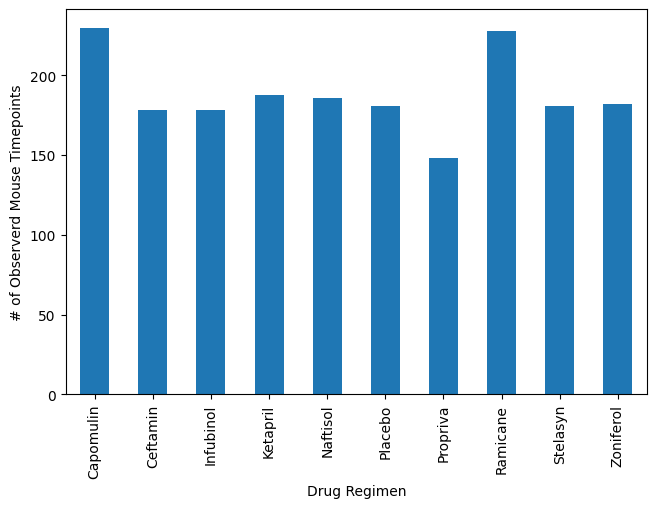

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
reg_count=clean_study_data.groupby("Drug Regimen").size()
reg_count.plot(kind="bar", figsize=(7.5, 5))
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observerd Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

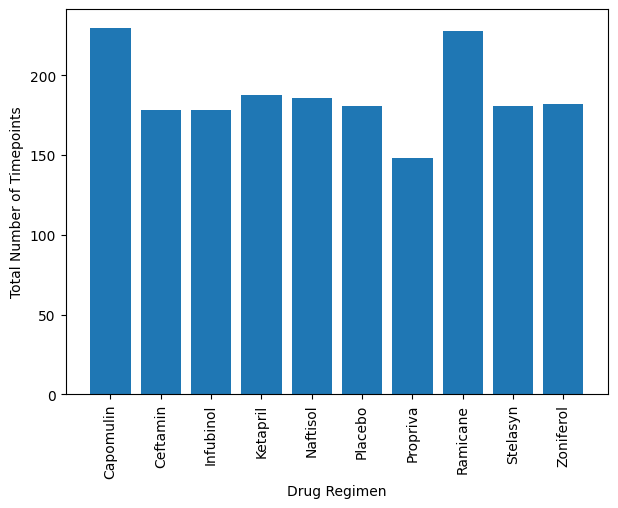

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(7, 5))
plt.bar(reg_count.index, reg_count.values)
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.xticks(rotation=90)
plt.show()

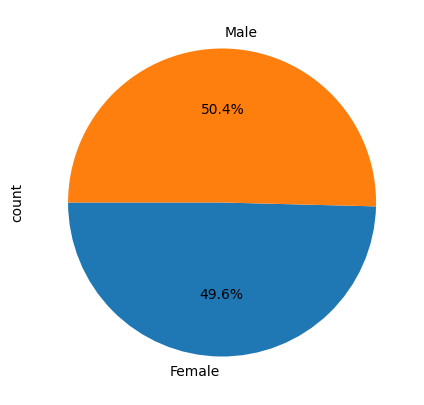

In [32]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
#sex_count = study_data_df.groupby("Sex")["Mouse ID"].nunique()
gender=clean_study_data.groupby("Sex")["Mouse ID"].nunique()
# Get the unique mice with their gender
#print(gender)
gender.plot(kind="pie", autopct='%1.1f%%', figsize=(5,5), startangle=180)
plt.ylabel('count')
plt.show()

# Make the pie chart


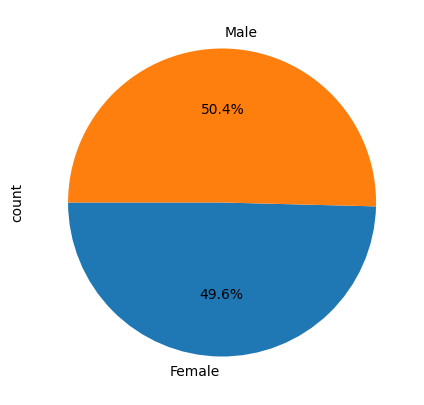

In [33]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure(figsize=(5, 5))
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=180)
#plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel("count")
plt.show()
# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [34]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=clean_study_data.groupby('Mouse ID')['Timepoint'].last().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge=pd.merge(last_timepoint, clean_study_data, on=['Mouse ID', 'Timepoint'])
#final_tumor_volume=merge[merge['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
#final_tumor_volume

In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatment_list:
    treatment_data = merge[merge['Drug Regimen'] == treatment]
    tumor_data.append(treatment_data['Tumor Volume (mm3)'].values)
    tumor_data_series = pd.Series(treatment_data['Tumor Volume (mm3)'].values)
    quartiles = tumor_data_series.quantile([.25,.5,.75])
    lowerq = quartiles.loc[.25]
    upperq = quartiles.loc[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_data_series.loc[(tumor_data_series < lower_bound) | (tumor_data_series > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")
    

 # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], dtype: float64)
Ramicane's potential outliers: Series([], dtype: float64)
Infubinol's potential outliers: 5    36.321346
dtype: float64
Ceftamin's potential outliers: Series([], dtype: float64)


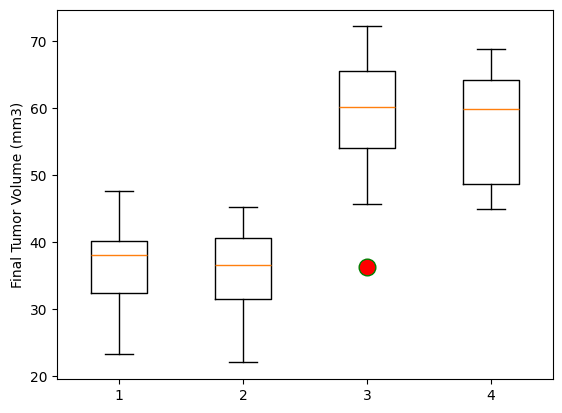

In [36]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Add title and labels

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(tumor_data, flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
# Show the plot
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

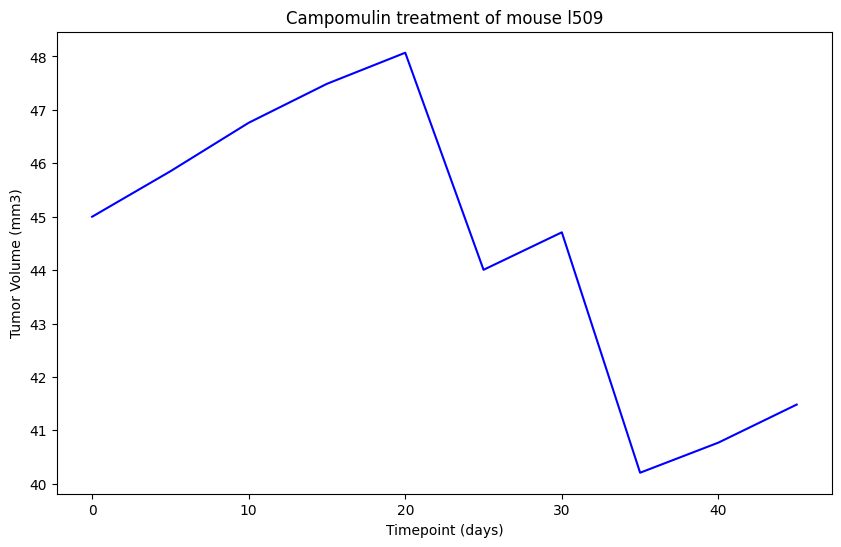

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
mouse_data = clean_study_data[clean_study_data['Mouse ID'] == mouse_id]

plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='', linestyle='-', color ='b')
plt.title(f'Campomulin treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
#plt.grid()


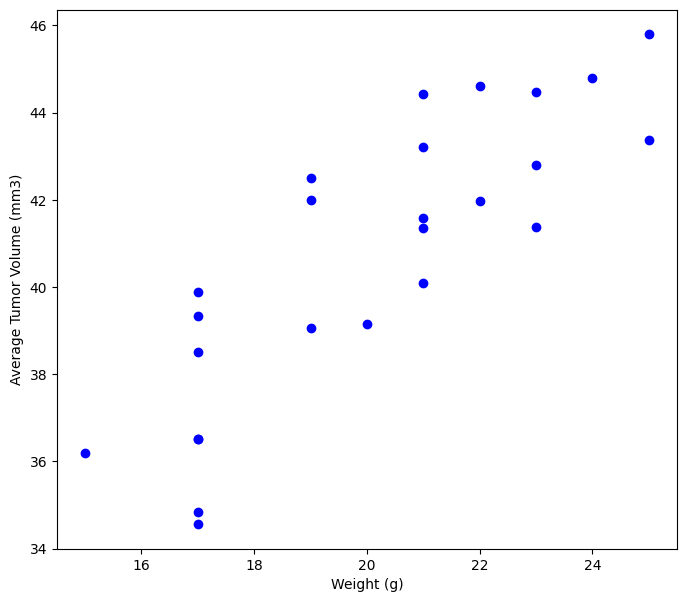

In [38]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index() 
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volume, mouse_weight_data, on='Mouse ID')
#capomulin_data
#average_tumor_volume 
#mouse_weight_data
#merged_data

plt.figure(figsize=(8, 7))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue')
# plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# plt.grid()
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumer volume is 0.84


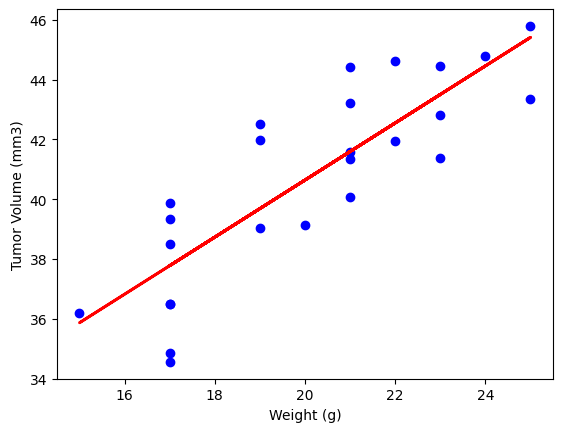

In [39]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_study_data[clean_study_data['Drug Regimen'] == 'Capomulin']
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index() 
mouse_weight_data = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = pd.merge(average_tumor_volume, mouse_weight_data, on='Mouse ID')
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

print(f"The correlation between mouse weight and the average tumer volume is {correlation:.2f}")
X = merged_data['Weight (g)'].values.reshape(-1, 1)
y = merged_data['Tumor Volume (mm3)'].values
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='blue', label='Data Points')
plt.plot(merged_data['Weight (g)'], predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


In [40]:
with pd.ExcelWriter('output_file.xlsx') as writer:
    summary_stats.to_excel(writer, sheet_name='summary_stats', index=True)